In [96]:
import dill
dill.dump_session('notebook_env.db')
#dill.load_session('notebook_env.db')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d_parser = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M:%S')
dataset = pd.read_csv('foreveralone.csv', parse_dates=['time'], date_parser=d_parser)

In [3]:
dataset.columns

Index(['time', 'gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight',
       'virgin', 'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'attempt_suicide', 'employment',
       'job_title', 'edu_level', 'improve_yourself_how'],
      dtype='object')

In [4]:
dataset.dtypes

time                     datetime64[ns]
gender                           object
sexuallity                       object
age                               int64
income                           object
race                             object
bodyweight                       object
virgin                           object
prostitution_legal               object
pay_for_sex                      object
friends                         float64
social_fear                      object
depressed                        object
what_help_from_others            object
attempt_suicide                  object
employment                       object
job_title                        object
edu_level                        object
improve_yourself_how             object
dtype: object

In [5]:
dataset.describe(include='all')

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
count,469,469,469,469.000000,469,469,469,469,469,469,469.000000,469,469,469,469,469,457,469,469
unique,468,4,3,NaN,13,25,4,2,2,3,NaN,2,2,51,2,9,275,9,62
top,2016-05-18 07:41:18,Male,Straight,NaN,$0,White non-Hispanic,Normal weight,Yes,No,No,NaN,Yes,Yes,I don't want help,No,A student,Student,"Some college, no degree",None
freq,2,393,415,NaN,160,336,269,352,361,318,NaN,308,312,222,384,174,50,137,106
first,2016-05-17 20:04:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2016-09-04 23:10:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,23.963753,NaN,NaN,NaN,NaN,NaN,NaN,7.956716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6.023526,NaN,NaN,NaN,NaN,NaN,NaN,34.371500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## F.r.i.e.n.d.s.
Max friends is 600 - too much of them if we are talking about "IRL".

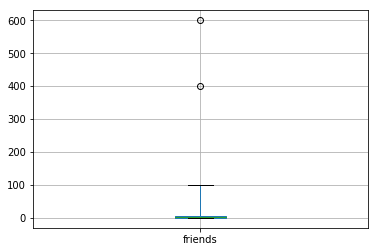

In [6]:
fig, ax = plt.subplots()
# ax.set_ylim(0, 105)
# whiskers on 0.3 and 99.7 percentile to determine outliers
dataset.boxplot(column='friends', ax=ax, whis=[0.3,99.7])

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: friends, dtype: object

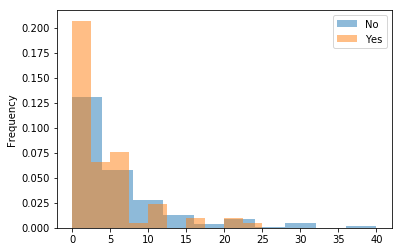

In [7]:
dataset.loc[dataset['friends'] <= 50,:] \
        .groupby('attempt_suicide')['friends'] \
        .plot.hist(legend=True, density=True, alpha = 0.5)

In [8]:
dataset = dataset[dataset['friends'] < dataset['friends'].quantile(0.997)]

social_fear
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: friends, dtype: object

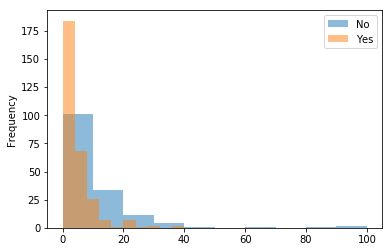

In [49]:
dataset.groupby('social_fear')['friends'].plot.hist(legend=True, alpha = 0.5)

In [50]:
dataset.groupby('social_fear')['friends'].max()

social_fear
No     100.0
Yes     40.0
Name: friends, dtype: float64

It seems like all fine - people with social fear have less friend.

## Improvments and help
We have two pretty similar columns: **improve_yourself_how** and **what_help_from_others**. As marked in the dataset descripton, they are "*Check all that apply*". As we can see, they are actually comma separated lists of improvements or helps. It's not really good representation for our classifier because "Therapy, join clubs" and "Other exercise, Therapy" is absolutely different values (although it is obvious to us that in both therapy is presented).

I think, it's good a idea to add separate features e.g. therapy column with True and False values. Also, it could be useful to add  total amount of selected improvements.

In [9]:
dataset['improve_yourself_how'].head(15)

0                                                  None
1                      join clubs/socual clubs/meet ups
2                                        Other exercise
3                            Joined a gym/go to the gym
4                                                  None
5     Joined a gym/go to the gym, join clubs/socual ...
6                                                  None
7     Therapy, join clubs/socual clubs/meet ups, Non...
8                   Joined a gym/go to the gym, Therapy
9                                               Therapy
10     Other exercise, join clubs/socual clubs/meet ups
11           Joined a gym/go to the gym, Other exercise
12    Joined a gym/go to the gym, Therapy, join club...
13                                                 None
14    Cosmetic survey, Joined a gym/go to the gym, T...
Name: improve_yourself_how, dtype: object

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_improves, dtype: object

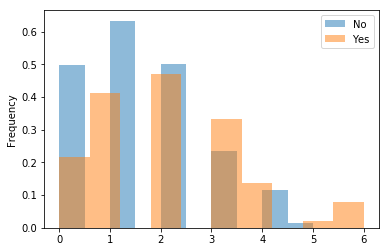

In [10]:
dataset['improve_yourself_how'] = dataset['improve_yourself_how'].str.lower()
# none isn't an improvment, so we don't need to count it
dataset['total_improves'] = dataset['improve_yourself_how'].str.split(',').apply(lambda x: len([i for i in x if i != 'none']))
dataset.groupby('attempt_suicide')['total_improves'].plot.hist(legend=True, density=True, alpha = 0.5)

In [11]:
improvements = dataset['improve_yourself_how'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)
improvements = improvements.str.strip()
top_improvements = improvements.value_counts()

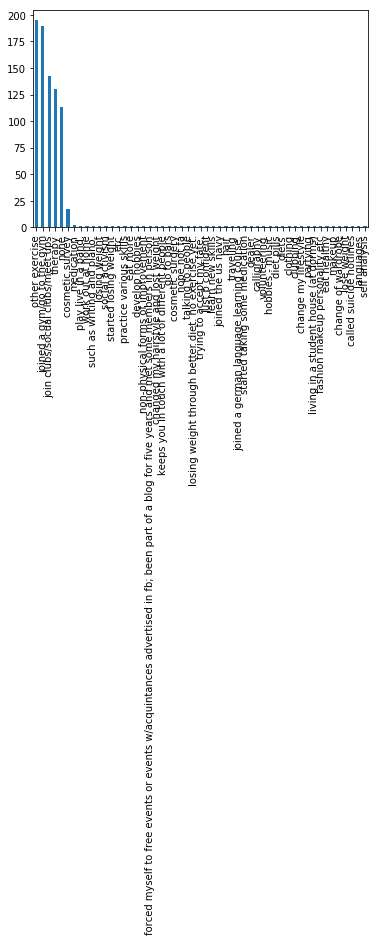

In [12]:
top_improvements.plot(kind='bar')

In [16]:
# Most of improvements found in the dataset only once. 
# Actually there are some mistypes and values with pretty similar sense. But for now let's leave it as it is.
# As far as they can't help us to understand polulation, it's good idea to remove these improvements

In [13]:
top_improvements = top_improvements[top_improvements > 5]

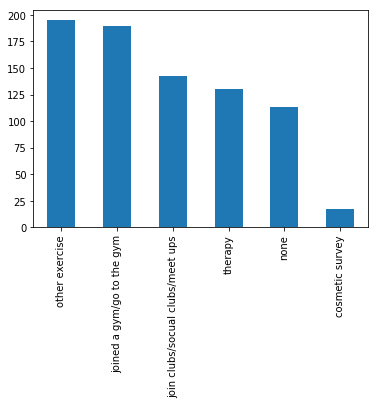

In [14]:
top_improvements.plot(kind='bar')

In [19]:
# Much better.
# Now lets add these improvements to the data set as new features

In [15]:
for imp in top_improvements.index:
    dataset['[improve] {}'.format(imp)] = dataset['improve_yourself_how'].str.contains(imp, regex=False)

In [16]:
col = {x:'sum' for x in dataset.columns if '[improve]' in x}
dataset.groupby('attempt_suicide').agg(col).apply(lambda x: x/x.sum(), axis=1)

,[improve] other exercise,[improve] joined a gym/go to the gym,[improve] join clubs/socual clubs/meet ups,[improve] therapy,[improve] none,[improve] cosmetic survey
attempt_suicide,,,,,,
No,0.246753,0.250000,0.181818,0.141234,0.159091,0.021104
Yes,0.251462,0.210526,0.175439,0.251462,0.087719,0.023392


In [22]:
# The same processing for what_help_from_others

attempt_suicide
No     AxesSubplot(0.125,0.125;0.775x0.755)
Yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_help, dtype: object

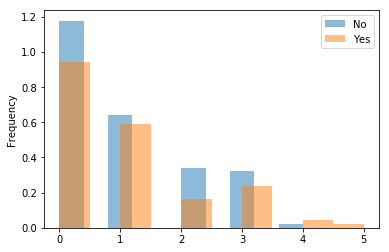

In [17]:
dataset['what_help_from_others'] = dataset['what_help_from_others'].str.lower()
dataset['total_help'] = dataset['what_help_from_others'].str.split(',').apply(lambda x: len([i for i in x if i != "i don't want help"]))
dataset.groupby('attempt_suicide')['total_help'].plot.hist(legend=True, density=True, alpha = 0.5)

In [18]:
help_from_others = dataset['what_help_from_others'].str.split(',').apply(pd.Series).stack().reset_index(drop=True)
help_from_others = help_from_others.str.strip()

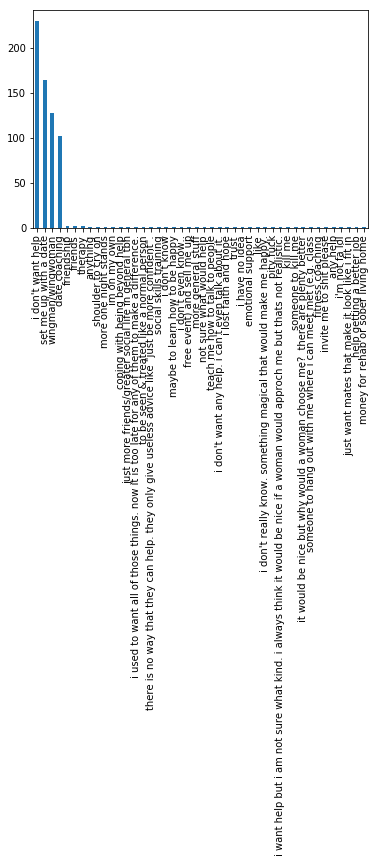

In [19]:
top_help_from_others = help_from_others.value_counts()
top_help_from_others.plot(kind='bar')

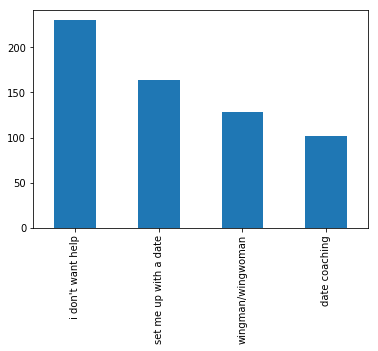

In [20]:
top_help_from_others = top_help_from_others[top_help_from_others > 5]
top_help_from_others.plot(kind='bar')

In [21]:
for hlp in top_help_from_others.index:
    dataset['[help] {}'.format(hlp)] = dataset['what_help_from_others'].str.contains(hlp, regex=False)

In [22]:
col = {x:'sum' for x in dataset.columns if '[help]' in x}
dataset.groupby('attempt_suicide').agg(col).apply(lambda x: x/x.sum(), axis=1)

,[help] i don't want help,[help] set me up with a date,[help] wingman/wingwoman,[help] date coaching
attempt_suicide,,,,
No,0.363636,0.270793,0.206963,0.158607
Yes,0.392523,0.224299,0.196262,0.186916


## Job title classification
**job_title** has na values. But it's not a problem, because as we will see below, all na values meanas "unemployed".

In [49]:
job_dataset = dataset.loc[:,('job_title', 'employment', 'edu_level')].applymap(lambda x: x.strip().lower() if type(x) == str else x)
job_dataset[pd.isna(job_dataset['job_title'])]

,job_title,employment,edu_level
30,NaN,a student,"some high school, no diploma"
54,NaN,a student,"high school graduate, diploma or the equivalen..."
55,NaN,out of work but not currently looking for work,"some college, no degree"
126,NaN,out of work but not currently looking for work,"some college, no degree"
130,NaN,out of work but not currently looking for work,"some college, no degree"
166,NaN,out of work but not currently looking for work,"some college, no degree"
170,NaN,out of work but not currently looking for work,associate degree
283,NaN,a student,"some college, no degree"
352,NaN,out of work and looking for work,"high school graduate, diploma or the equivalen..."
371,NaN,a student,"some high school, no diploma"


In [27]:
job_dataset['job_title'].value_counts()

student                                                                                82
none                                                                                   31
unemployed                                                                             15
engineer                                                                               12
software developer                                                                      7
software engineer                                                                       7
nothing                                                                                 6
.                                                                                       6
-                                                                                       6
cashier                                                                                 5
intern                                                                                  5
teacher   

The real problem here is that we have too many different titles and this is a raw input.
Of course it's possible to replace "grad student" and "student?" with "student", "what?" with "None" etc.
But it seems that this way don't give us more information (employment column is more informative).
Maybe we can to get more interesting results with job categories. I suggest to use categories and job titles from [O*Net Online](https://www.onetonline.org/find/family?f=0&g=Go) to create simple classifier.

In [125]:
from joblib import load
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

job_classifier = load('job_classifier.joblib')

In [130]:
job_classifier.predict(['None'])

array(['None'], dtype=object)

In [131]:
job_dataset['job_title'] = job_dataset['job_title'].fillna('None')
job_dataset['job_family'] = job_classifier.predict(job_dataset['job_title'])

In [132]:
job_dataset['job_family'].value_counts()

None                                              314
Architecture and Engineering                       27
Computer and Mathematical                          26
Business and Financial Operations                  15
Arts, Design, Entertainment, Sports, and Media     11
Sales and Related                                  10
Office and Administrative Support                  10
Management                                          9
Transportation and Material Moving                  7
Healthcare Support                                  7
Life, Physical, and Social Science                  7
Construction and Extraction                         6
Education, Training, and Library                    6
Food Preparation and Serving Related                3
Personal Care and Service                           3
Installation, Maintenance, and Repair               2
Healthcare Practitioners and Technical              1
Farming, Fishing, and Forestry                      1
Production                  

In [140]:
job_dataset.loc[job_dataset['job_family'] == 'None','job_title']

1                                 -
2                        unemployed
3                           student
6                           janitor
12                          student
13                             neet
14                           broker
15                          student
16                           intern
17                          student
18                          student
21                          student
22                          student
23                    kitchen staff
25                          student
26                              guy
27                         none (?)
28                          student
29                             peon
30                             None
31                          student
32                          student
33                             chef
34                          butcher
35          medical student, year 4
37                        junior ba
38                   cinema student
40                          

In [141]:
# it's good for some classes and not really good for other. But it's better than nothing.
#job_dataset.to_csv('jobs_with_categories.csv') #save classification results

In [23]:
job_dataset = pd.read_csv('jobs_with_categories.csv', index_col=0)
dataset['job_family'] = job_dataset['job_family']
dataset = dataset.drop(['what_help_from_others', 'improve_yourself_how', 'job_title'], axis=1)

In [57]:
def plot_stacked_bars(ds, groupby, cutoff=0):
    ds = ds.groupby(groupby).filter(lambda x: (len(x) > cutoff))
    ds.groupby(groupby)['attempt_suicide'] \
            .value_counts(normalize=True).unstack() \
            .sort_values(axis=0, ascending=False, by='Yes') \
            .plot.bar(figsize=(15, 7), stacked=True)

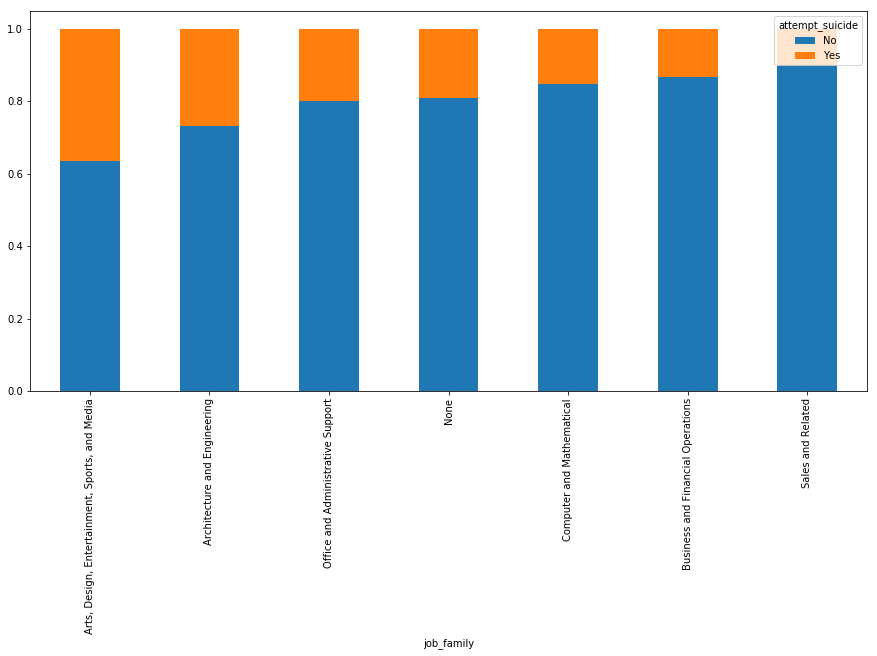

In [56]:
job_family_counts = dataset.groupby('job_family')['attempt_suicide'].count()
rm = job_family_counts[job_family_counts < 10].index
dataset = dataset[~dataset['job_family'].isin(rm)]
plot_stacked_bars(dataset, 'job_family')

## Categorial variables
Let's see how categorical variables influence distribution of suicide attempts. Also we need to remove categories that are represented by a small amount of people or merge them into one category. If we have only two people with income $50 000 and they have no attempted suicide, obviously we haven't enough reason to believe that this "magical" income protects people against suicide. But it's not so obvious to a classifier.

In [24]:
def plot_pie(ds, groupby, fsize=(15,10), rename_groups={'No': '{}-', 'Yes': '{}+'}):
    rename_dict = {} if rename_groups == None else {key:value.format(groupby) for (key,value) in rename_groups.items()}
    ds.groupby(groupby)['attempt_suicide'].value_counts().unstack() \
            .rename(rename_dict, axis=0) \
            .rename({'No': 'Suicide-', 'Yes': 'Suicide+'}, axis=1) \
            .transpose().plot.pie(subplots=True, figsize=fsize, autopct='%1.0f%%')

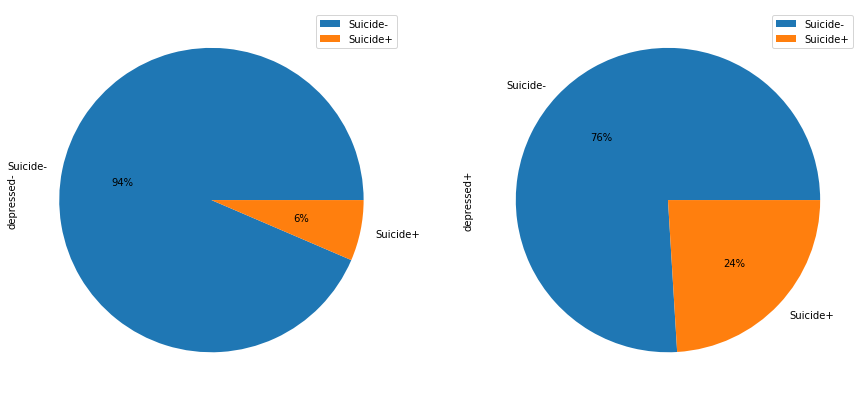

In [25]:
plot_pie(dataset, 'depressed')

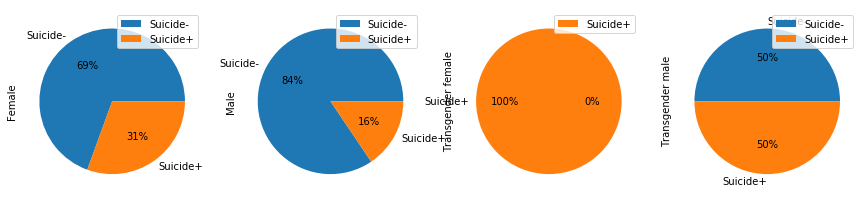

In [26]:
plot_pie(dataset, 'gender', rename_groups=None)

In [27]:
dataset.groupby('gender')['attempt_suicide'].value_counts()

gender              attempt_suicide
Female              No                  50
                    Yes                 22
Male                No                 331
                    Yes                 61
Transgender female  Yes                  1
Transgender male    No                   1
                    Yes                  1
Name: attempt_suicide, dtype: int64

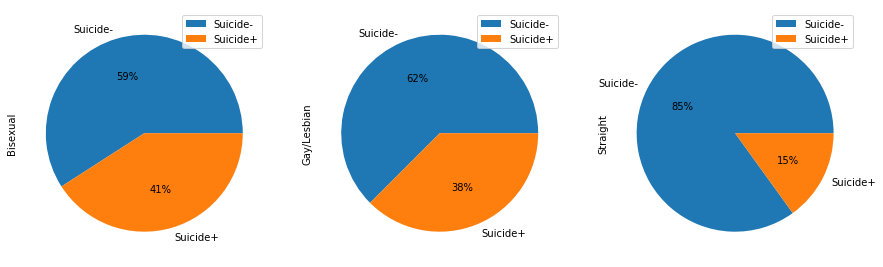

In [28]:
dataset = dataset.groupby('gender').filter(lambda x: len(x) > 5)
plot_pie(dataset, 'sexuallity', rename_groups=None)

In [29]:
dataset.groupby('sexuallity')['attempt_suicide'].value_counts()

sexuallity   attempt_suicide
Bisexual     No                  26
             Yes                 18
Gay/Lesbian  No                   5
             Yes                  3
Straight     No                 350
             Yes                 62
Name: attempt_suicide, dtype: int64

In [31]:
dataset['race'].value_counts()

White non-Hispanic                                                                 332
Asian                                                                               54
Hispanic (of any race)                                                              31
Black                                                                               22
Mixed                                                                                3
Middle Eastern                                                                       2
Indian                                                                               2
Multi                                                                                1
Mixed white/asian                                                                    1
White and Native American                                                            1
Native american                                                                      1
Half Asian half white                      

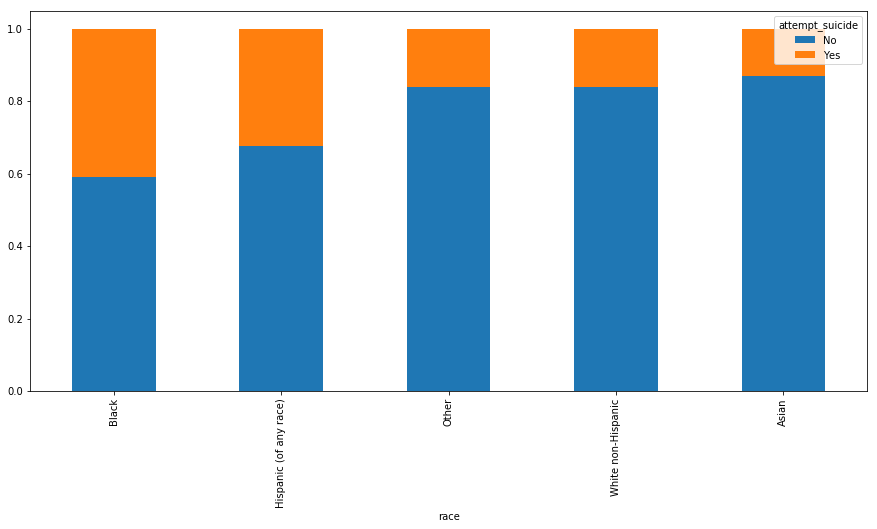

In [32]:
dataset.loc[~dataset['race'].isin(dataset['race'].value_counts()[:4].index), 'race'] = 'Other'
plot_stacked_bars(dataset, 'race')

In [33]:
incomes = dataset.groupby('income')['attempt_suicide'].count()
incomes

income
$0                      159
$1 to $10,000            98
$10,000 to $19,999       58
$100,000 to $124,999      3
$125,000 to $149,999      6
$150,000 to $174,999      2
$174,999 to $199,999      2
$20,000 to $29,999       44
$200,000 or more          2
$30,000 to $39,999       39
$40,000 to $49,999       15
$50,000 to $74,999       27
$75,000 to $99,999        9
Name: attempt_suicide, dtype: int64

In [37]:
dataset.loc[dataset['income'].isin(incomes[incomes < 9].index), 'income'] = '$100,000 or more'

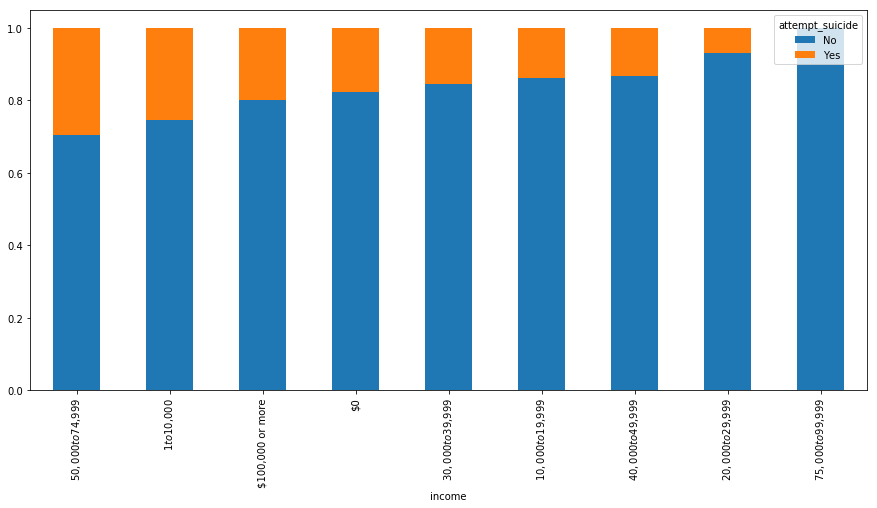

In [38]:
plot_stacked_bars(dataset, 'income')

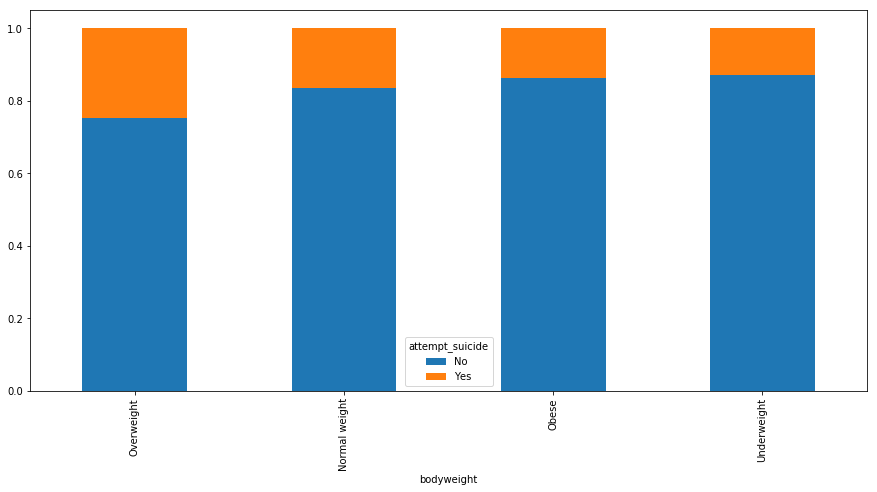

In [39]:
plot_stacked_bars(dataset, 'bodyweight')

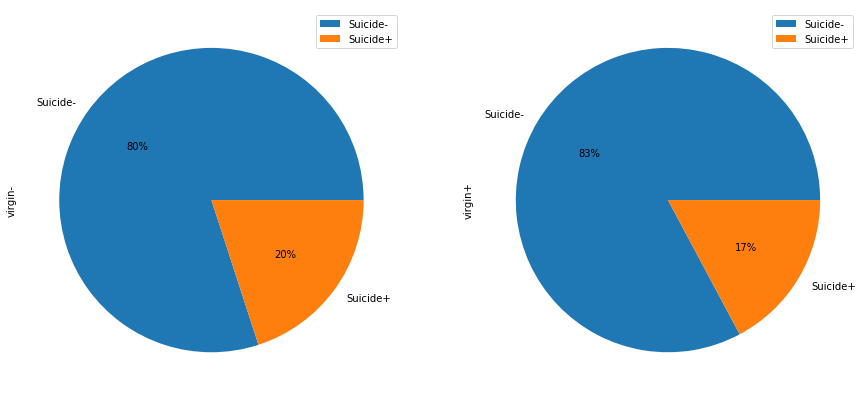

In [40]:
plot_pie(dataset, 'virgin')

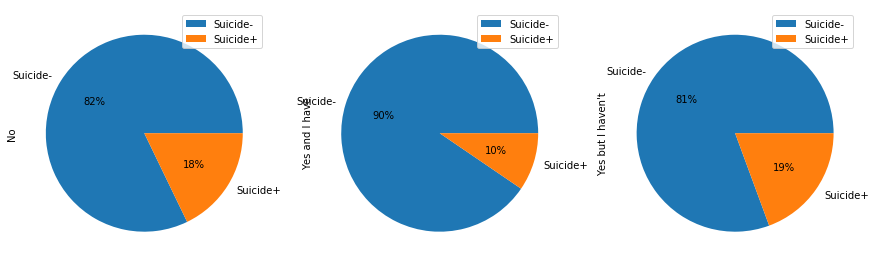

In [41]:
plot_pie(dataset, 'pay_for_sex', rename_groups=None)

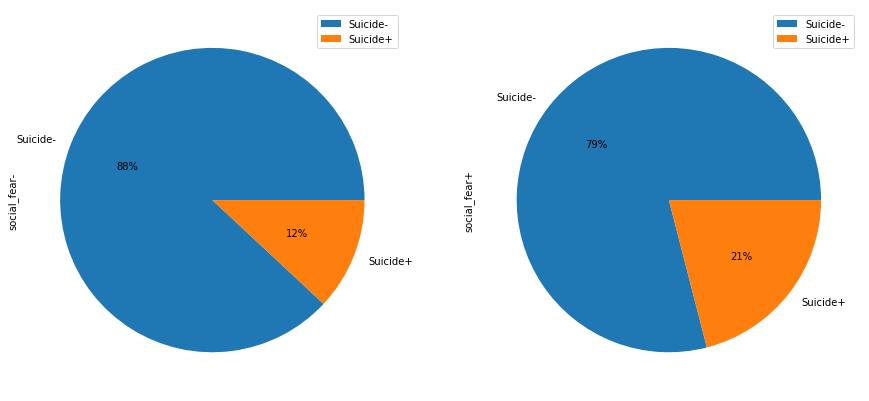

In [42]:
plot_pie(dataset, 'social_fear')

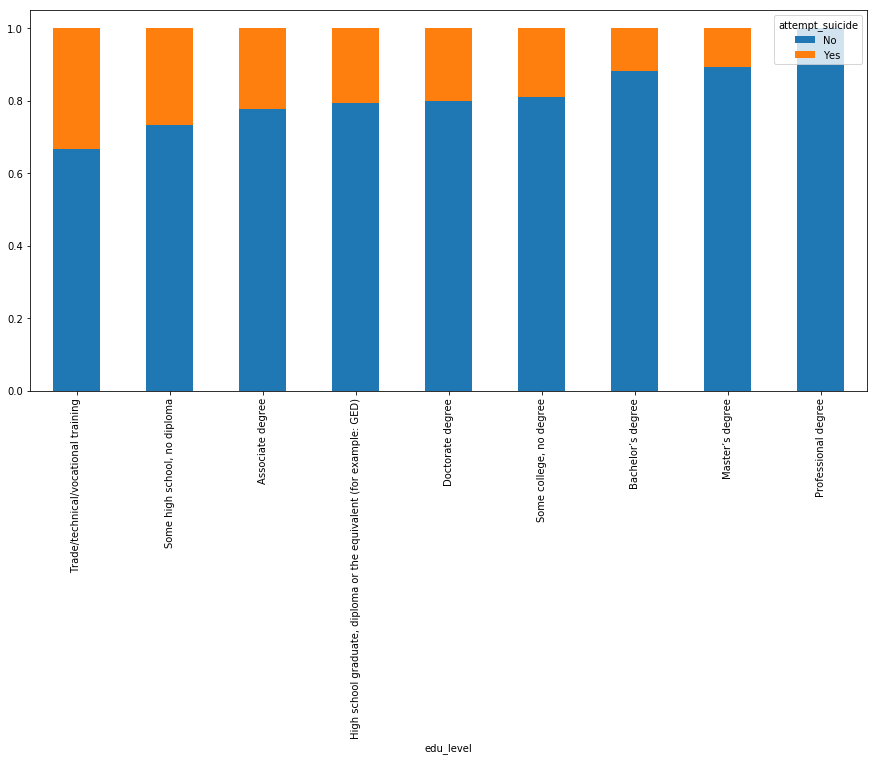

In [45]:
plot_stacked_bars(dataset, 'edu_level')

In [47]:
dataset.groupby('employment')['attempt_suicide'].count()

employment
A homemaker                                         3
A student                                         173
Employed for wages                                168
Military                                            5
Out of work and looking for work                   37
Out of work but not currently looking for work     40
Retired                                             3
Self-employed                                      22
Unable to work                                     13
Name: attempt_suicide, dtype: int64

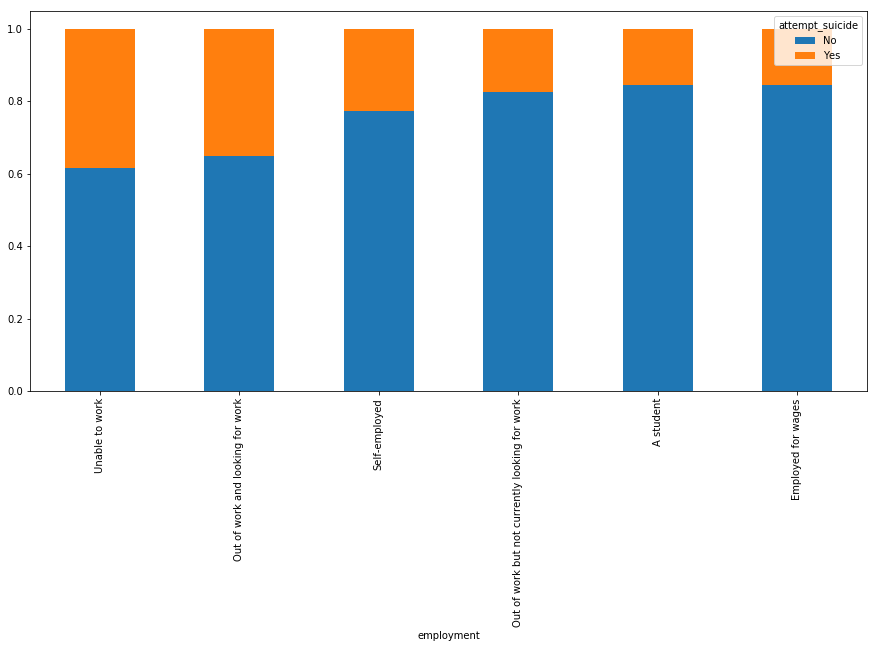

In [48]:
dataset = dataset[~dataset['employment'].isin(['A homemaker', 'Military', 'Retired'])]
plot_stacked_bars(dataset, 'employment')

In [47]:
dataset.groupby('prostitution_legal')['pay_for_sex'].value_counts(normalize=True)

prostitution_legal  pay_for_sex      
No                  No                   0.665738
                    Yes but I haven't    0.295265
                    Yes and I have       0.038997
Yes                 No                   0.712963
                    Yes but I haven't    0.212963
                    Yes and I have       0.074074
Name: pay_for_sex, dtype: float64

In [59]:
dataset.shape

(400, 29)

## Classification

In [104]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, auc

#dataset = dataset.drop('time', axis=1)
numerical_features = ['age', 'friends', 'total_improves', 'total_help']
categorical_features = [x for x in dataset.columns if x not in numerical_features]
categorical_features.remove('attempt_suicide')

dataset.loc[:, numerical_features] = dataset.loc[:, numerical_features].astype(float)

col_transformer = make_column_transformer(
        (preprocessing.MinMaxScaler(), numerical_features),
        (preprocessing.OrdinalEncoder(), categorical_features))

pipeline = Pipeline([
    ('prep', col_transformer),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=5000, tol=1e-4, solver='liblinear')),
])

parameters = {
    'clf__C': np.arange(0.1, 2, 0.1),
    'clf__penalty': ['l1', 'l2']}

X_train, X_test, Y_train, Y_test = train_test_split(
    dataset.loc[:, dataset.columns != 'attempt_suicide'], 
    dataset['attempt_suicide'], test_size=0.2)

suicide_predictor_gs = GridSearchCV(pipeline, parameters, cv=5, iid=True, scoring='balanced_accuracy')
suicide_predictor_gs.fit(X_train, Y_train)

suicide_predictor = suicide_predictor_gs.best_estimator_

all_predictions = suicide_predictor.predict(X_test)
print(classification_report(Y_test,all_predictions))

              precision    recall  f1-score   support

          No       0.89      0.76      0.82        67
         Yes       0.30      0.54      0.39        13

   micro avg       0.72      0.72      0.73        80
   macro avg       0.60      0.65      0.61        80
weighted avg       0.80      0.72      0.75        80



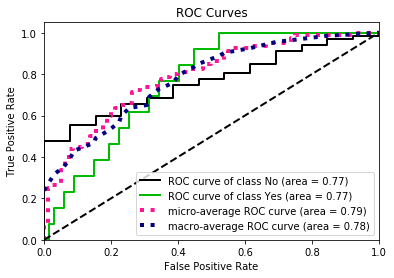

In [105]:
import scikitplot.metrics as skplt
y_probas = suicide_predictor.predict_proba(X_test)
skplt.plot_roc (Y_test, y_probas)
plt.show()

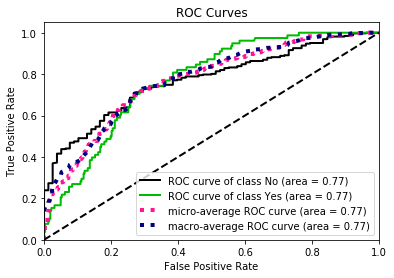

In [106]:
y_probas = suicide_predictor.predict_proba(dataset.loc[:, dataset.columns != 'attempt_suicide'])
skplt.plot_roc (dataset['attempt_suicide'], y_probas)
plt.show()

In [107]:
suicide_predictor_gs.best_params_ 

{'clf__C': 0.2, 'clf__penalty': 'l1'}